In [1]:
import pandas as pd
import pydot
from IPython.display import SVG

#### Load the example dataset

In [2]:
data_dir = "https://raw.githubusercontent.com/bd2kccd/py-causal/master/data/charity.txt"
df = pd.read_table(data_dir, sep="\t")

#### Start Java VM

In [3]:
from pycausal.pycausal import pycausal as pc
pc = pc()
pc.start_vm()

#### Load causal algorithms from the py-causal library and Run PC

In [4]:
from pycausal import search as s
tetrad = s.tetradrunner()
tetrad.getAlgorithmParameters(algoId = 'pc-all', testId = 'fisher-z')

alpha: Cutoff for p values (alpha) (min = 0.0) (java.lang.Double) [default:0.01]
fasRule: Adjacency search: 1 = PC, 2 = PC-Stable, 3 = Concurrent PC-Stable (java.lang.Integer) [default:1]
colliderDiscoveryRule: Collider discovery: 1 = Lookup from adjacency sepsets, 2 = Conservative (CPC), 3 = Max-P (java.lang.Integer) [default:1]
conflictRule: Collider conflicts: 1 = Overwrite, 2 = Orient bidirected, 3 = Prioritize existing colliders (java.lang.Integer) [default:1]
depth: Maximum size of conditioning set (unlimited = -1) (java.lang.Integer) [default:-1]
useMaxPOrientationHeuristic: Yes if the heuristic for orienting unshielded colliders for max P should be used (java.lang.Boolean) [default:true]
maxPOrientationMaxPathLength: Maximum path length for the unshielded collider heuristic for max P (min = 0) (java.lang.Integer) [default:3]
bootstrapSampleSize: The number of bootstraps (min = 0) (java.lang.Integer) [default:0]
bootstrapEnsemble: Ensemble method: Preserved (0), Highest (1), Maj

In [5]:
tetrad.run(algoId = 'pc-all', dfs = df, testId = 'fisher-z', alpha = 0.05, 
           fasRule = 2, colliderDiscoveryRule = 2, conflictRule = 1,
           useMaxPOrientationHeuristic = True, verbose = True)

#### PC Continuous' Result's Nodes

In [6]:
tetrad.getNodes()

['TangibilityCondition',
 'AmountDonated',
 'Sympathy',
 'Imaginability',
 'Impact']

#### PC Continuous' Result's Edges

In [7]:
tetrad.getEdges()

['TangibilityCondition --- Sympathy',
 'Sympathy --- Impact',
 'AmountDonated --- Impact',
 'Imaginability --- Impact']

#### Plot The Result's Graph

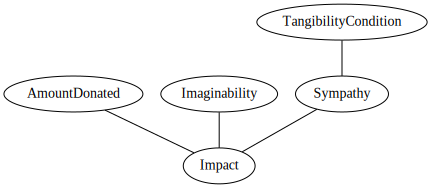

In [8]:
dot = tetrad.getDot()
svg_str = dot.create_svg(prog='dot')
SVG(svg_str)

#### Stop Java VM

In [9]:
pc.stop_vm()